In [1]:

from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.style.use('demo_style.mplstyle')

#tf.keras.backend.clear_session()  # For easy reset of notebook state.


In [2]:
#get job info

import os

os.environ["SLURM_JOB_ID"]

'771048'

In [3]:
q003_data = np.load('/global/cscratch1/sd/stephey/march2020_data/Output/q003_data.npy')
#q003_max = np.load('/global/cscratch1/sd/stephey/march2020_data/Output/q003_max.npy')
#q003_norm = np.load('/global/cscratch1/sd/stephey/march2020_data/Output/q003_norm.npy')

q103_data = np.load('/global/cscratch1/sd/stephey/march2020_data/Output2/q103_data.npy') 
#q103_max = np.load('/global/cscratch1/sd/stephey/march2020_data/Output2/q103_max.npy')
#q103_norm = np.load('/global/cscratch1/sd/stephey/march2020_data/Output2/q103_norm.npy')

#add in our post-quench data
#need to cut that down to size, too

pq_data = np.load('/global/cscratch1/sd/stephey/march2020_data/Q3_Q103_postquench/pq_data.npy')

In [4]:


#we shuffle in the training so it's ok
qall_data = np.concatenate((q003_data, q103_data, pq_data), axis=0)

print(qall_data.shape)


(9807, 625, 512)


In [6]:
#get our encoded data

encoded_all = np.load('encoded_all.npy')

In [13]:

#load our kmeans labels

q003_labels = np.load('/global/cscratch1/sd/stephey/march2020_data/magnet-notebooks/scripts/q003_kmeans_labels_nocurrent.npy')
q103_labels = np.load('/global/cscratch1/sd/stephey/march2020_data/magnet-notebooks/scripts/q103_kmeans_labels_nocurrent.npy')
pq_labels = 2*np.ones(pq_data.shape[0], dtype=np.int)


In [14]:
#Try pca on encoded images why not
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
#need to flatten i guess?
img_pca = pca.fit_transform(encoded_all)

#boundary 1
boundary1 = q003_data.shape[0]

color_key=['red','blue']
color_label=[]
for i in range(qall_data.shape[0]):
    if i < boundary1:
        color_label.append(color_key[0])
    else:
        color_label.append(color_key[1])
        
print(len(color_label))   
print(len(img_pca))

9807
9807


In [22]:
qall_labels = np.concatenate((q003_labels, q103_labels, pq_labels), axis=0)

print(qall_labels.shape)

#boundary 1
boundary1 = q003_data.shape[0]

color_key=['purple','green','red']
color_label=[]
for label in qall_labels:
    if label == 0:
        color_label.append(color_key[0])
    elif label == 1:
        color_label.append(color_key[1])
    elif label == 2:
        color_label.append(color_key[2])
    else:
        print("label incorrect")
        
#print(color_label)

(9807,)


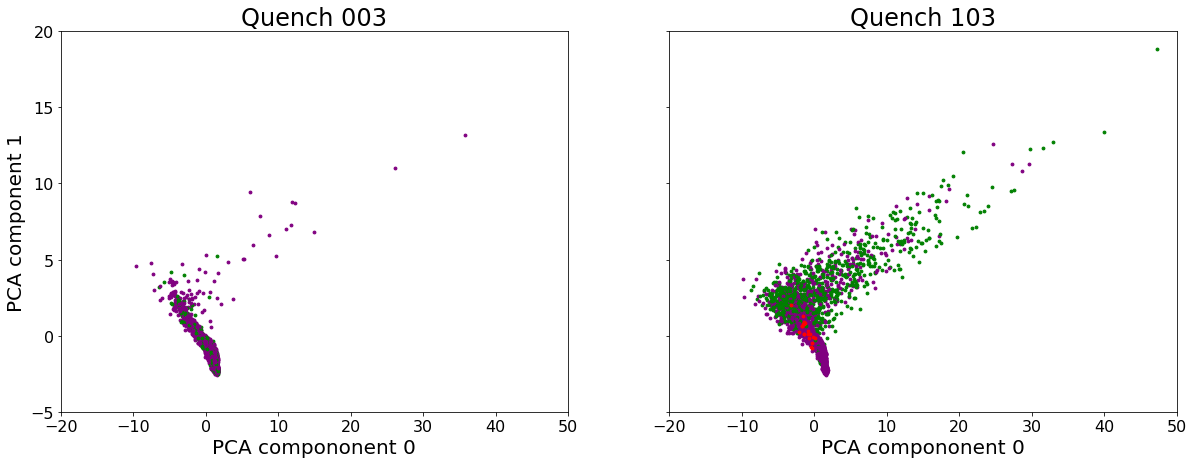

In [23]:
msize = 8
xlimits = (-20,50)
ylimits = (-5,20)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20,7)
for i in range(len(qall_labels)):
    if i <= q003_data.shape[0]:
        axs[0].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[0].set_title('Quench 003')
        axs[0].set_xlim(xlimits)
        axs[0].set_ylim(ylimits)  
    else:
        axs[1].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[1].set_title('Quench 103')
        axs[1].set_xlim(xlimits)
        axs[1].set_ylim(ylimits)      

for ax in axs.flat:
    ax.set(xlabel='PCA compononent 0', ylabel='PCA component 1')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()



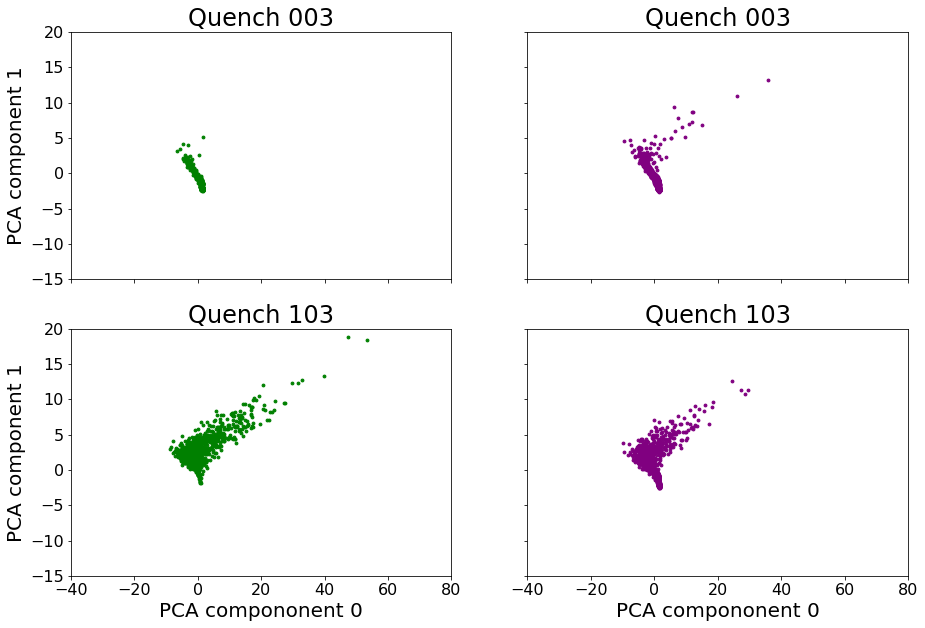

In [24]:


#make additoinal figure plotting green and purple separately

#make the same plot but show all quenches separately

msize = 8
xlimits = (-40,80)
ylimits = (-15,20)

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15,10)
for i in range(qall_data.shape[0]):
    if (i <= q003_data.shape[0]) and (color_label[i]=='green'):
        axs[0, 0].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[0, 0].set_title('Quench 003')
        axs[0, 0].set_xlim(xlimits)
        axs[0, 0].set_ylim(ylimits)
    elif (i <= q003_data.shape[0]) and (color_label[i]=='purple'):
        axs[0, 1].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[0, 1].set_title('Quench 003')
        axs[0, 1].set_xlim(xlimits)
        axs[0, 1].set_ylim(ylimits)
    elif (i > q003_data.shape[0]) and (color_label[i]=='green'):
        axs[1, 0].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[1, 0].set_title('Quench 103')
        axs[1, 0].set_xlim(xlimits)
        axs[1, 0].set_ylim(ylimits)        
    elif (i > q003_data.shape[0]) and (color_label[i]=='purple'):
        axs[1, 1].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[1, 1].set_title('Quench 103')
        axs[1, 1].set_xlim(xlimits)
        axs[1, 1].set_ylim(ylimits)        

for ax in axs.flat:
    ax.set(xlabel='PCA compononent 0', ylabel='PCA component 1')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()



In [19]:


#boundary 1
boundary1 = q003_data.shape[0]

color_key=['red','blue']
color_label=[]
for i in range(qall_data.shape[0]):
    if i < boundary1:
        color_label.append(color_key[0])
    else:
        color_label.append(color_key[1])
        
print(len(color_label))   
print(len(img_pca))



9807
9807


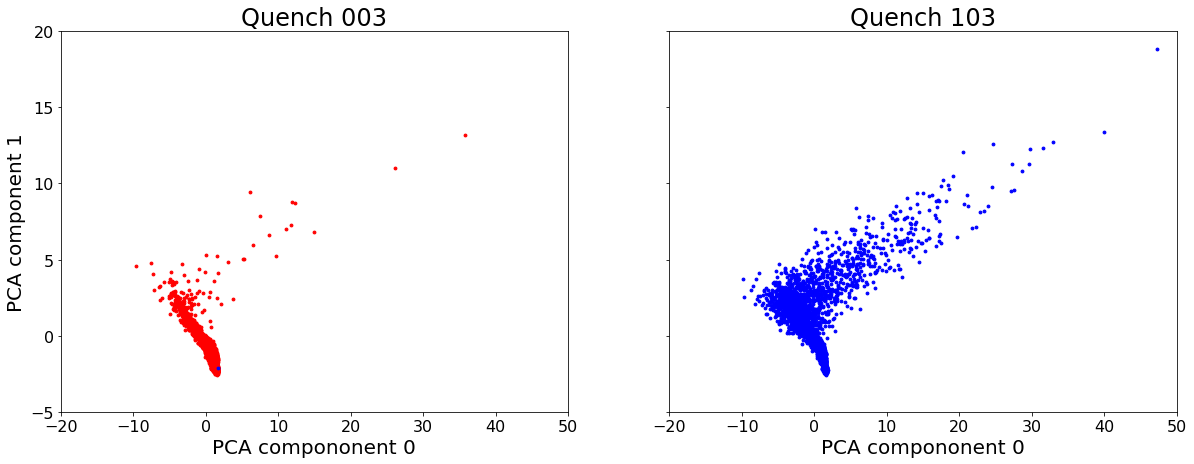

In [20]:
msize = 8
xlimits = (-20,50)
ylimits = (-5,20)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20,7)
for i in range(len(qall_labels)):
    if i <= q003_data.shape[0]:
        axs[0].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[0].set_title('Quench 003')
        axs[0].set_xlim(xlimits)
        axs[0].set_ylim(ylimits)  
    else:
        axs[1].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[1].set_title('Quench 103')
        axs[1].set_xlim(xlimits)
        axs[1].set_ylim(ylimits)      

for ax in axs.flat:
    ax.set(xlabel='PCA compononent 0', ylabel='PCA component 1')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()